In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


# statistics

In [ ]:
import pickle
with open('/content/drive/MyDrive/BGU - data_mining/df_all_texts_with_antisemitism_timestamps.pickle', 'rb') as f:
    df_all_texts_with_antisemitism_timestamps = pickle.load(f)

In [ ]:
df_all_texts_with_antisemitism_timestamps

,id,sum_of_antisemitism,timestamp
0,t3_16wuocg,0,2023-10-01 10:28:02
1,t3_16wvusf,0,2023-10-01 11:40:50
2,t3_16x08vv,0,2023-10-01 15:45:25
3,t3_16x0qk9,0,2023-10-01 16:07:16
4,t3_16xsk8j,1,2023-10-02 12:59:31
...,...,...,...
180062,t1_k7asxcv,0,2023-11-01 01:45:45
180063,t1_k7asxkq,0,2023-11-01 01:45:48
180064,t1_k7asy1d,0,2023-11-01 01:45:54
180065,t1_k7asy1w,0,2023-11-01 01:45:54


In [ ]:
import pandas as pd


start_date = pd.to_datetime('2023-10-01')
weekly_dfs = []

for i in range(4):

    end_date = start_date + pd.Timedelta(days=7)

    weekly_df = df_all_texts_with_antisemitism_timestamps[
        (df_all_texts_with_antisemitism_timestamps['timestamp'] >= start_date) &
        (df_all_texts_with_antisemitism_timestamps['timestamp'] <= end_date)
    ]

    weekly_dfs.append(weekly_df)

    start_date = end_date + pd.Timedelta(days=1)

for i, df in enumerate(weekly_dfs):
    print(f"Week {i+1}: {len(df)} rows")


Week 1: 5466 rows
Week 2: 64562 rows
Week 3: 61348 rows
Week 4: 71361 rows


In [ ]:
weekly_dfs[3]

,id,sum_of_antisemitism,timestamp
6153,t3_17frgqk,0,2023-10-25 00:02:51
6154,t3_17frun5,0,2023-10-25 00:21:14
6155,t3_17fs85a,0,2023-10-25 00:39:15
6156,t3_17fsa8p,0,2023-10-25 00:42:05
6157,t3_17fscz1,0,2023-10-25 00:45:53
...,...,...,...
180062,t1_k7asxcv,0,2023-10-31 23:45:45
180063,t1_k7asxkq,0,2023-10-31 23:45:48
180064,t1_k7asy1d,0,2023-10-31 23:45:54
180065,t1_k7asy1w,0,2023-10-31 23:45:54


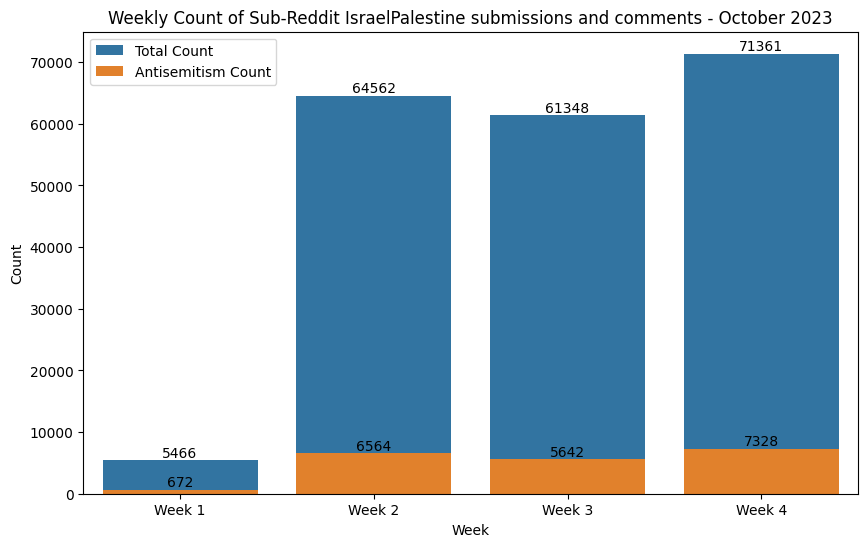

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

weeks = []
total_counts = []
antisemitism_counts = []

for i, df in enumerate(weekly_dfs):
    weeks.append(f"Week {i+1}")
    total_counts.append(len(df))
    antisemitism_counts.append(len(df[df['sum_of_antisemitism'] > 0]))

# Create a dataframe for the bar chart
bar_chart_data = pd.DataFrame({
    'Week': weeks,
    'Total Count': total_counts,
    'Antisemitism Count': antisemitism_counts
})

# Create the bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Week', y='Total Count', data=bar_chart_data, label='Total Count')
sns.barplot(x='Week', y='Antisemitism Count', data=bar_chart_data, label='Antisemitism Count')

# Add values on top of the bars
for index, row in bar_chart_data.iterrows():
    plt.text(row.name, row['Total Count'], str(row['Total Count']), ha='center', va='bottom')
    plt.text(row.name, row['Antisemitism Count'], str(row['Antisemitism Count']), ha='center', va='bottom')


plt.xlabel("Week")
plt.ylabel("Count")
plt.title("Weekly Count of Sub-Reddit IsraelPalestine submissions and comments - October 2023")
plt.legend()
plt.show()


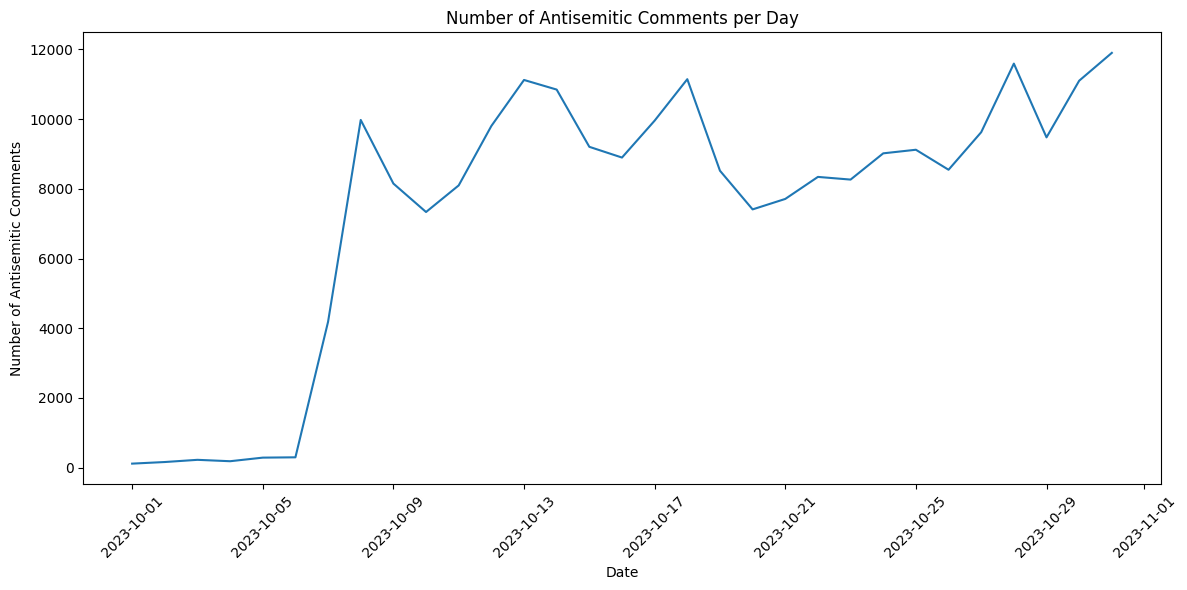

In [ ]:
from datetime import datetime


# Group by day and count antisemitic comments
daily_counts = df_all_texts_with_antisemitism_timestamps.groupby(df_all_texts_with_antisemitism_timestamps['timestamp'].dt.date)['sum_of_antisemitism'].count()

# Create the line chart
plt.figure(figsize=(12, 6))
sns.lineplot(x=daily_counts.index, y=daily_counts.values)
plt.xlabel('Date')
plt.ylabel('Number of Antisemitic Comments')
plt.title('Number of Antisemitic Comments per Day')
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent labels from overlapping
plt.show()


In [ ]:
daily_counts

,sum_of_antisemitism
timestamp,
2023-10-01,117
2023-10-02,163
2023-10-03,226
2023-10-04,186
2023-10-05,289
2023-10-06,298
2023-10-07,4187
2023-10-08,9976
2023-10-09,8151


# graph - nodes as users

## load edges

In [ ]:
import pickle
with open('/content/drive/MyDrive/BGU - data_mining/edegs_with_strength.pickle', 'rb') as f:
    edegs_with_strength = pickle.load(f)

In [ ]:
edegs_with_strength.head(2)

,user_A,to_user_B,size
0,--Jimmy_Kudo--,Nyeteka,1
1,--Jimmy_Kudo--,coffeemedd,1


## load nodes (users)

In [ ]:
with open('/content/drive/MyDrive/BGU - data_mining/df_users.pickle', 'rb') as f:
    df_users = pickle.load(f)
df_users.head(2)

,user_name,num_of_posts_or_comments,num_antisemetic_comments,max_streanght_antisemitism,sum_antisemitism,mean_strength_antisemitism,timestamp
0,Inevitable_Drawer145,6,0,0,0,0.0,2023-10-15 04:12:25
1,Responsible_Ad6938,5,1,1,1,0.2,2023-10-23 17:00:20


In [ ]:
df_users.sort_values(by=['num_antisemetic_comments','mean_strength_antisemitism'], ascending=False).head(2)

,user_name,num_of_posts_or_comments,num_antisemetic_comments,max_streanght_antisemitism,sum_antisemitism,mean_strength_antisemitism,timestamp
14881,1235813213455891442,478,109,8,128,0.267782,2023-10-01 20:18:49
12559,yogilawyer,429,97,7,193,0.449883,2023-10-03 09:11:54


## calculate class of a node

In [ ]:
from collections import Counter
mean_strength_ranges = [0.1,0.4]
num_antisemetic_comments_ranges = [3,6]
sum_antisemitism_ranges = [5,10]

def logic_for_anti_by_mean(mean, mean_strength_ranges):
  """
  the only choice that is not sensitive to time (all others would mark antisemitism with time)
  """
  if mean <= mean_strength_ranges[0]:
    return 'low'
  elif (mean > mean_strength_ranges[0]) and (mean <= mean_strength_ranges[1]):
    return 'medium'
  else:
    return 'high'


df_users['class'] = df_users['mean_strength_antisemitism'].apply(lambda x: logic_for_anti_by_mean(x, mean_strength_ranges))
nodes = df_users[['user_name','class']].copy()
nodes['class'].value_counts()

,count
class,
low,17221
high,2945
medium,2274


<Axes: title={'center': 'antisemitic level Distribution'}, xlabel='antisemtism level', ylabel='number of users'>

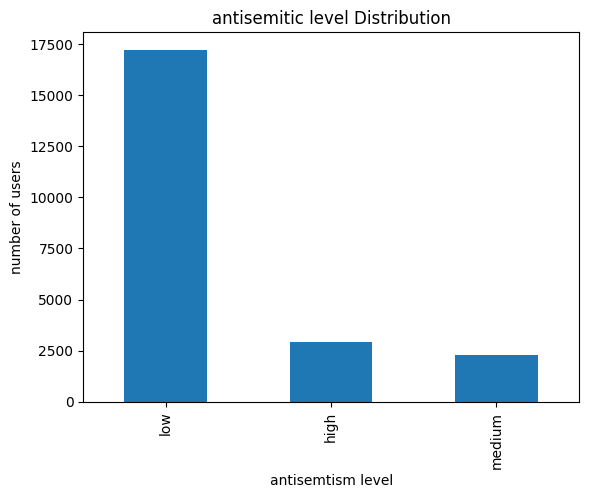

In [ ]:
nodes['class'].value_counts().plot(kind='bar', title='antisemitic level Distribution', xlabel='antisemtism level', ylabel='number of users', )

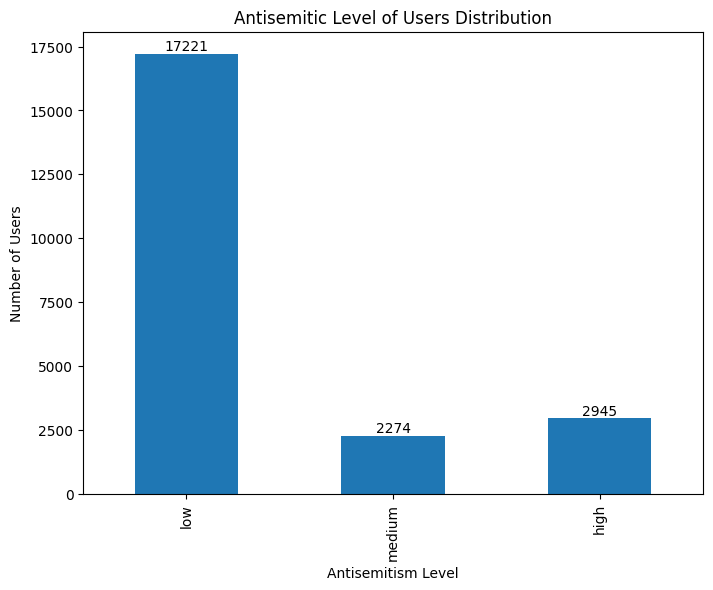

In [ ]:
import matplotlib.pyplot as plt

# Order the categories
ordered_categories = ['low', 'medium', 'high']
class_counts = nodes['class'].value_counts().reindex(ordered_categories, fill_value=0)


plt.figure(figsize=(8, 6))
bars = class_counts.plot(kind='bar')
plt.title('Antisemitic Level of Users Distribution')
plt.xlabel('Antisemitism Level')
plt.ylabel('Number of Users')

# Add value labels on top of each bar
for bar in bars.patches:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, int(height), ha='center', va='bottom')

plt.show()


In [ ]:
df_users.head(2)

,user_name,num_of_posts_or_comments,num_antisemetic_comments,max_streanght_antisemitism,sum_antisemitism,mean_strength_antisemitism,timestamp,class
0,Inevitable_Drawer145,6,0,0,0,0.0,2023-10-15 04:12:25,low
1,Responsible_Ad6938,5,1,1,1,0.2,2023-10-23 17:00:20,medium


## build the graph by nodes and edges, with strength and class properties

In [ ]:
import networkx as nx

graph = nx.Graph()

for index, row in df_users.iterrows():
    features = {col: row[col] for col in nodes.columns if col not in ['user_name','timestamp']}
    graph.add_node(row['user_name'], **features, start=row['timestamp'].date().day, end=31)

for index, row in edegs_with_strength.iterrows():
  source = row['user_A']
  target = row['to_user_B']
  strength = row['size']
  if source in graph.nodes and target in graph.nodes:
    graph.add_edge(source, target, weight=strength)



### save graph to file

In [ ]:
import pickle
with open('/content/drive/MyDrive/BGU - data_mining/antisemtism_graph.pickle', 'wb') as f:
    pickle.dump(graph, f)

### load graph

In [ ]:
import pickle
with open('/content/drive/MyDrive/BGU - data_mining/antisemtism_graph.pickle', 'rb') as f:
    graph = pickle.load(f)

In [ ]:
import networkx as nx
import json
import seaborn as sns
import matplotlib.pyplot as plt

# Example: Get the number of nodes and edges
num_nodes = graph.number_of_nodes()
num_edges = graph.number_of_edges()

# Print some information
print(f"Number of nodes: {num_nodes}")
print(f"Number of edges: {num_edges}")

Number of nodes: 22440
Number of edges: 104481


## add degree data to users dataframe

In [ ]:
import pickle
degrees = dict(graph.degree())
df_users['degree'] = df_users['user_name'].apply(lambda x: degrees[x])

with open('/content/drive/MyDrive/BGU - data_mining/df_users_degree.pickle', 'wb') as f:
    pickle.dump(df_users, f)

with open('/content/drive/MyDrive/BGU - data_mining/df_users_degree.pickle', 'rb') as f:
    df_users = pickle.load(f)

In [ ]:
df_users.head(2)

,user_name,num_of_posts_or_comments,num_antisemetic_comments,max_streanght_antisemitism,sum_antisemitism,mean_strength_antisemitism,timestamp,class,degree
0,Inevitable_Drawer145,6,0,0,0,0.0,2023-10-15 04:12:25,low,3
1,Responsible_Ad6938,5,1,1,1,0.2,2023-10-23 17:00:20,medium,3


## divide the users comments graph to sub-communities

In [ ]:
import community as community_louvain

# partition = nx.community.louvain_communities(graph, seed=42)
partition = community_louvain.best_partition(graph, random_state=42)

# Create subgraphs based on the community assignments
subgraphs = {}
for node, community_id in partition.items():
    if community_id not in subgraphs:
      subgraphs[community_id] = nx.Graph()
    subgraphs[community_id].add_node(node, **graph.nodes[node])  # Add node with its attributes

for u, v, data in graph.edges(data=True):
    community_id_u = partition[u]
    community_id_v = partition[v]
    if community_id_u == community_id_v:
        subgraphs[community_id_u].add_edge(u, v, **data)


Degree centrality for subgraph 6: {'St3voevo': 0.0030581039755351682, 'Extension_Shoe1824': 0.0030581039755351682, 'PokePersona': 0.0030581039755351682, 'Any-Ad-5475': 0.0030581039755351682, 'meido_zgs': 0.0030581039755351682, 'Mysterious-Raise4492': 0.0030581039755351682, 'LubedCompression': 0.009174311926605505, 'Accomplished-Fox2926': 0.009174311926605505, 'Connect-Spinach-811': 0.0030581039755351682, 'CohesiveBaboon': 0.0030581039755351682, 'tallzmeister': 0.0030581039755351682, 'TheUnknownNut22': 0.0061162079510703364, 'Agreeable-Menu': 0.0061162079510703364, 'yasmin678678': 0.0061162079510703364, 'cat-the-commie': 0.0030581039755351682, 'abendu': 0.0030581039755351682, 'Fantastic-Pin8483': 0.0030581039755351682, 'monkeycheese7': 0.0030581039755351682, 'jdhunt2234': 0.0030581039755351682, 'a_squared_add_one': 0.0030581039755351682, 'Averagebaddad': 0.0030581039755351682, 'Complete-Monk-1072': 0.0030581039755351682, 'ikchit_masang': 0.0061162079510703364, 'BannanaDilly': 0.00305810

#### export gragh

In [ ]:
subgraphs[6]
nx.write_gexf(subgraphs[3], "subgraph_3.gexf")

#### subgraph_3 by gephi

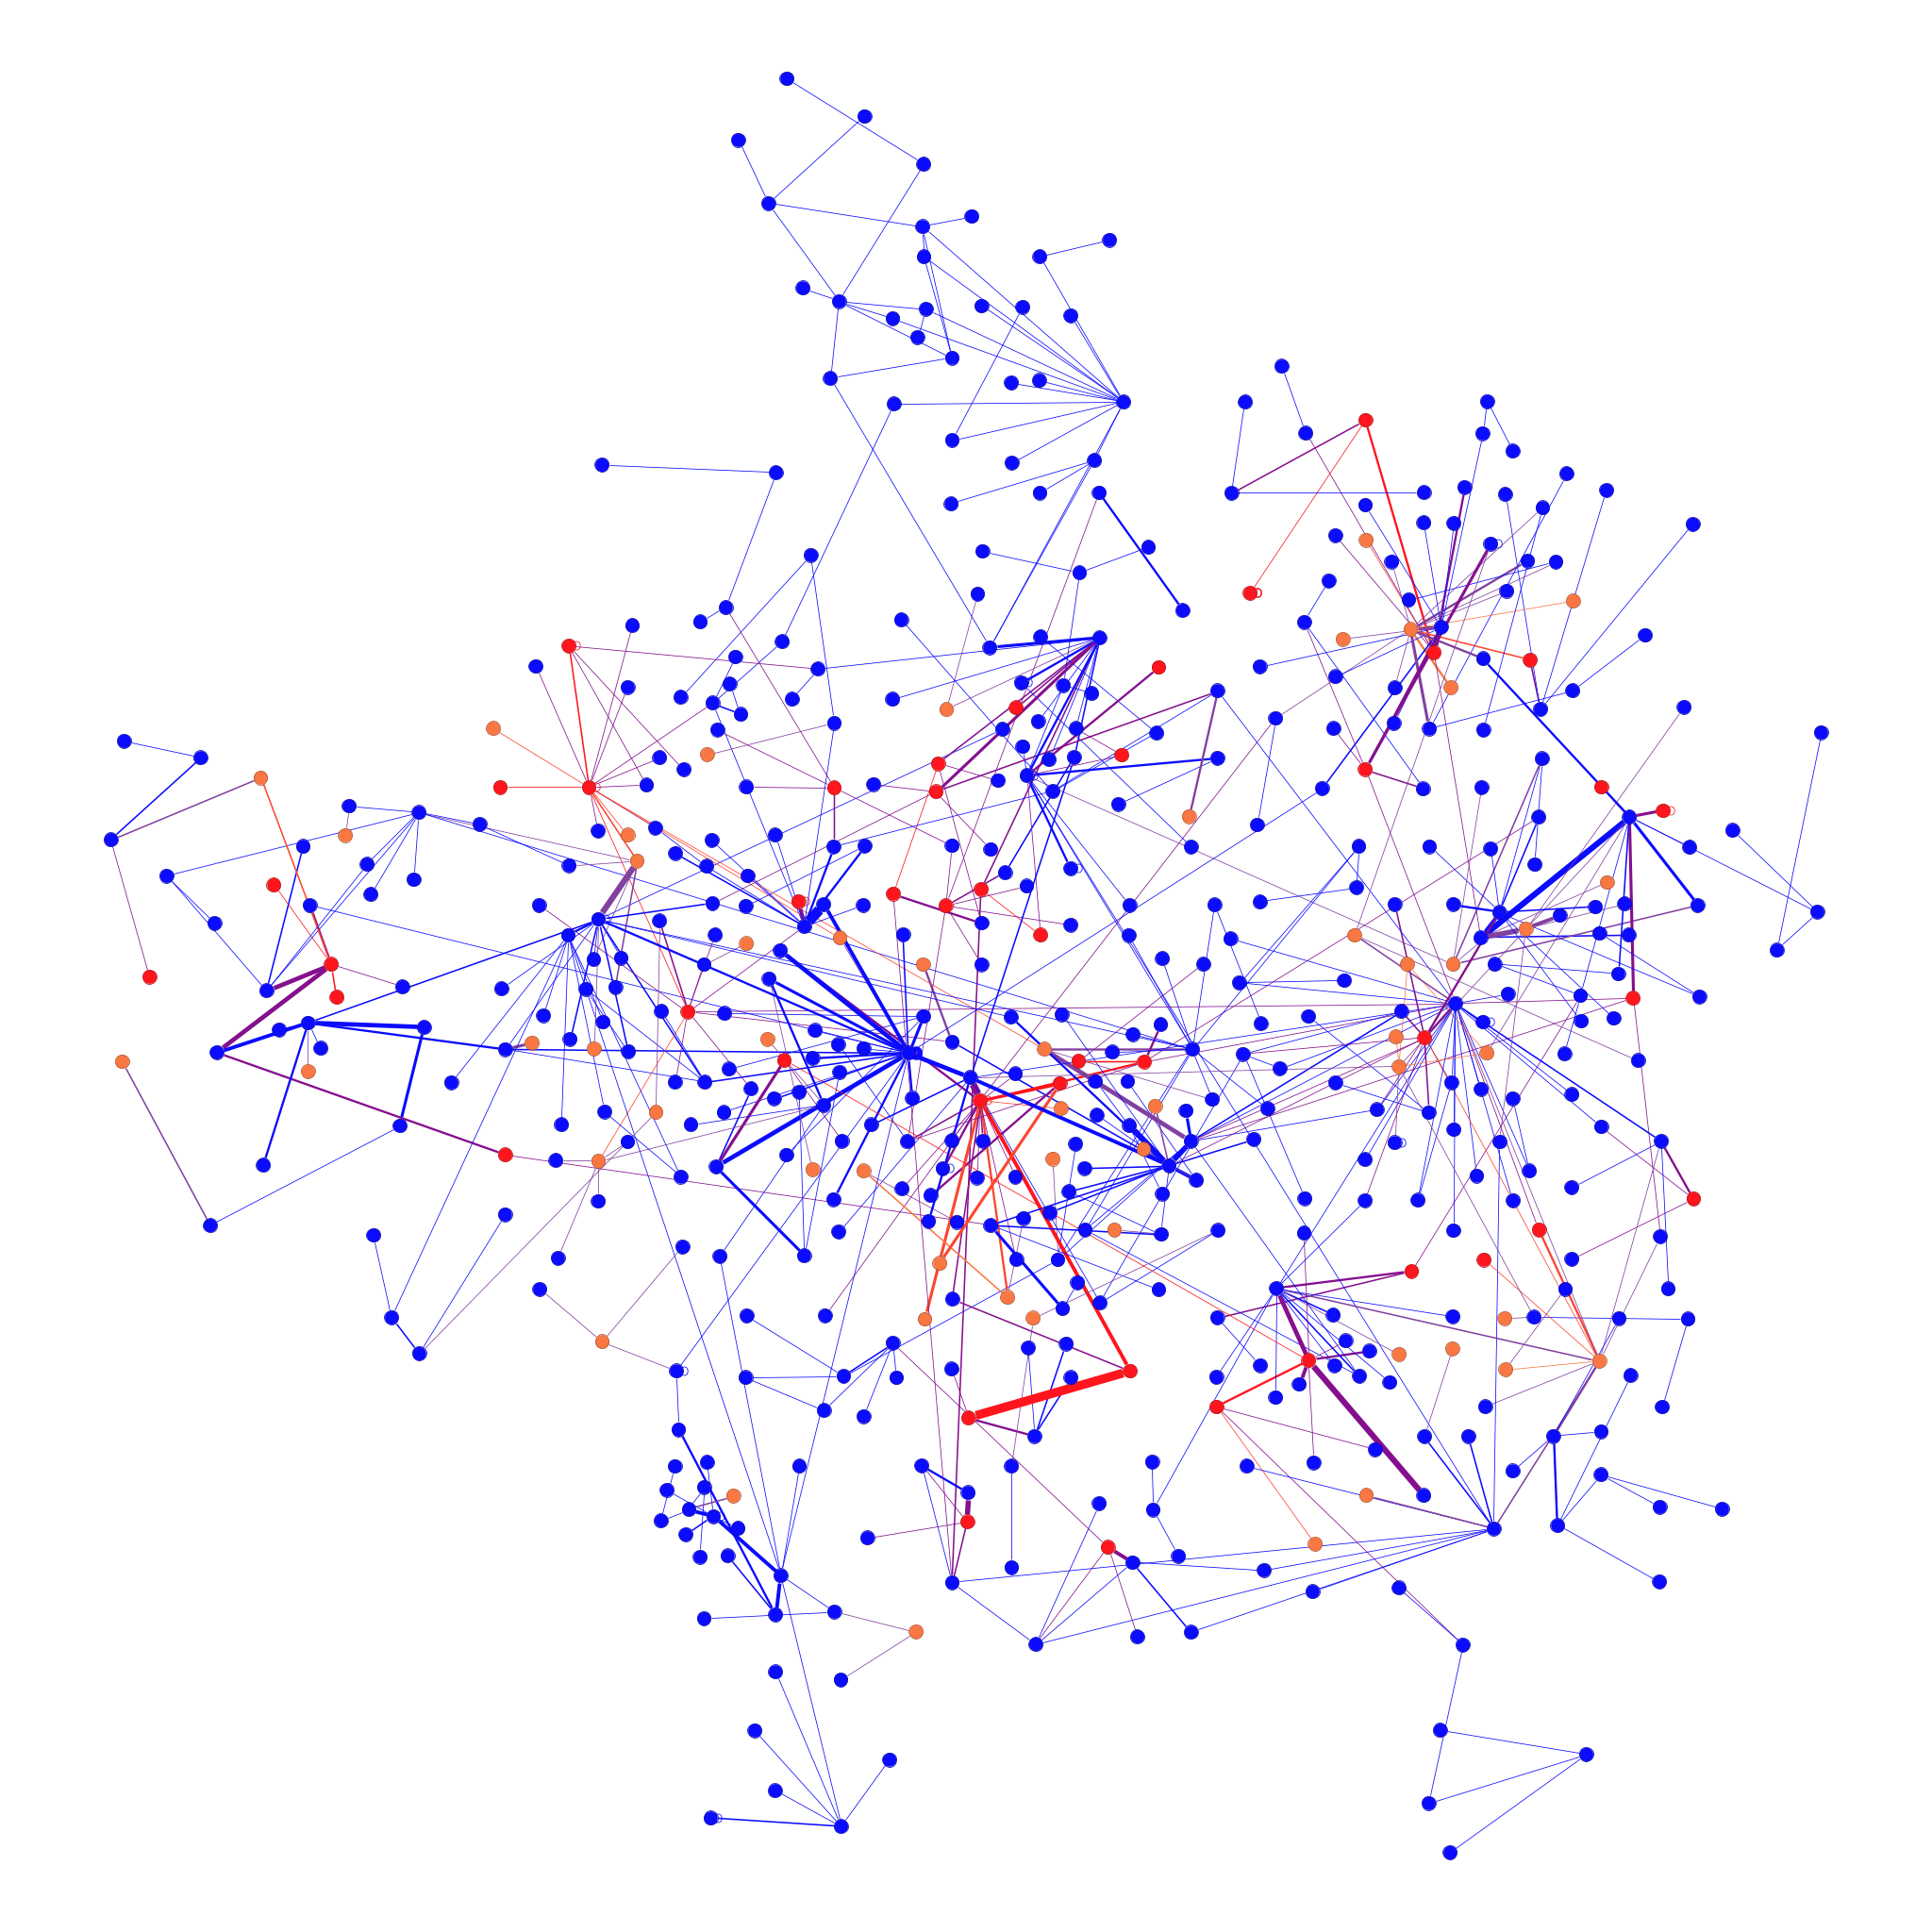

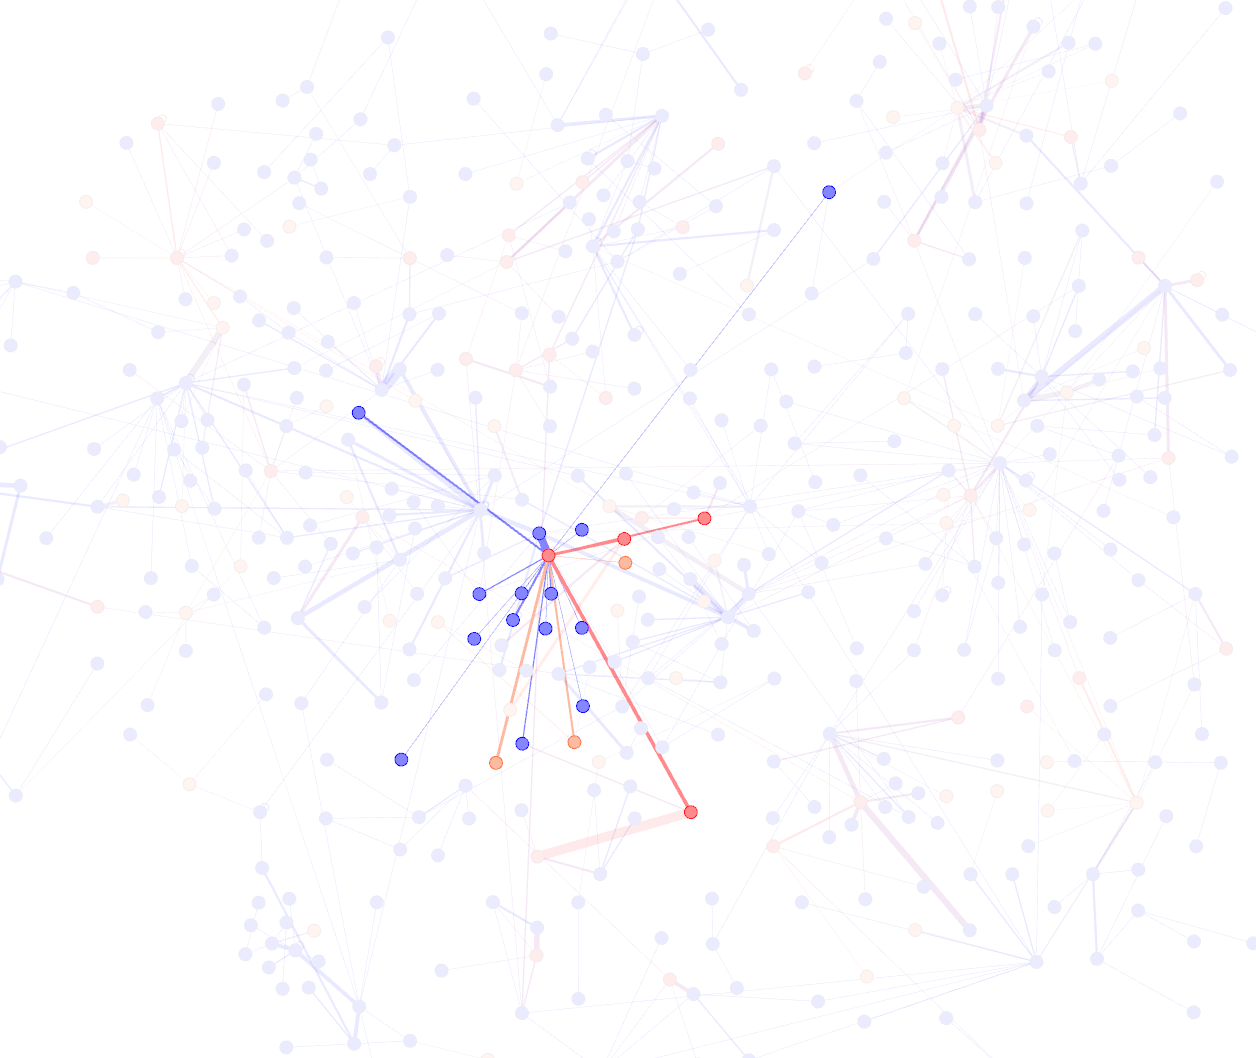

## check leading "actors" and their neighborhood

In [ ]:
df_users[(df_users['class'] == 'high') & (df_users.degree > 10)].sort_values(by=['mean_strength_antisemitism','degree'], ascending=False)[['user_name','mean_strength_antisemitism','class','degree']]

,user_name,mean_strength_antisemitism,class,degree
8760,animal_moth3r_,4.666667,high,15
7221,AdministrationIll829,4.625000,high,14
9813,Oabdi55,4.125000,high,11
20895,Paradoxziz,3.500000,high,49
11475,DeadPaliTrash,3.500000,high,24
...,...,...,...,...
10917,Yositoasty,0.411765,high,17
2188,Fickle-Bug6967,0.411765,high,12
3322,DeliveryPitiful9482,0.409091,high,16
4257,Occupied_Octopus,0.406250,high,20


In [ ]:
def get_subgraph(graph, user_id):
  """
  Returns a subgraph containing all nodes connected to a specific user.

  Args:
    graph: A NetworkX graph object.
    user_id: The ID of the user whose connections form the subgraph.

  Returns:
    A NetworkX graph object representing the subgraph, or None if the user_id is not in the graph.
  """
  if user_id not in graph:
    return None

  neighbors = list(graph.neighbors(user_id))
  subgraph_nodes = [user_id] + neighbors
  subgraph = graph.subgraph(subgraph_nodes)
  return subgraph



#### show sub-graph of the user 'Paradoxziz' (by gephi)

In [ ]:
user_id = 'Paradoxziz'
subgraph = get_subgraph(graph, user_id)

nx.write_gexf(subgraph, f"{user_id}_49.gexf")

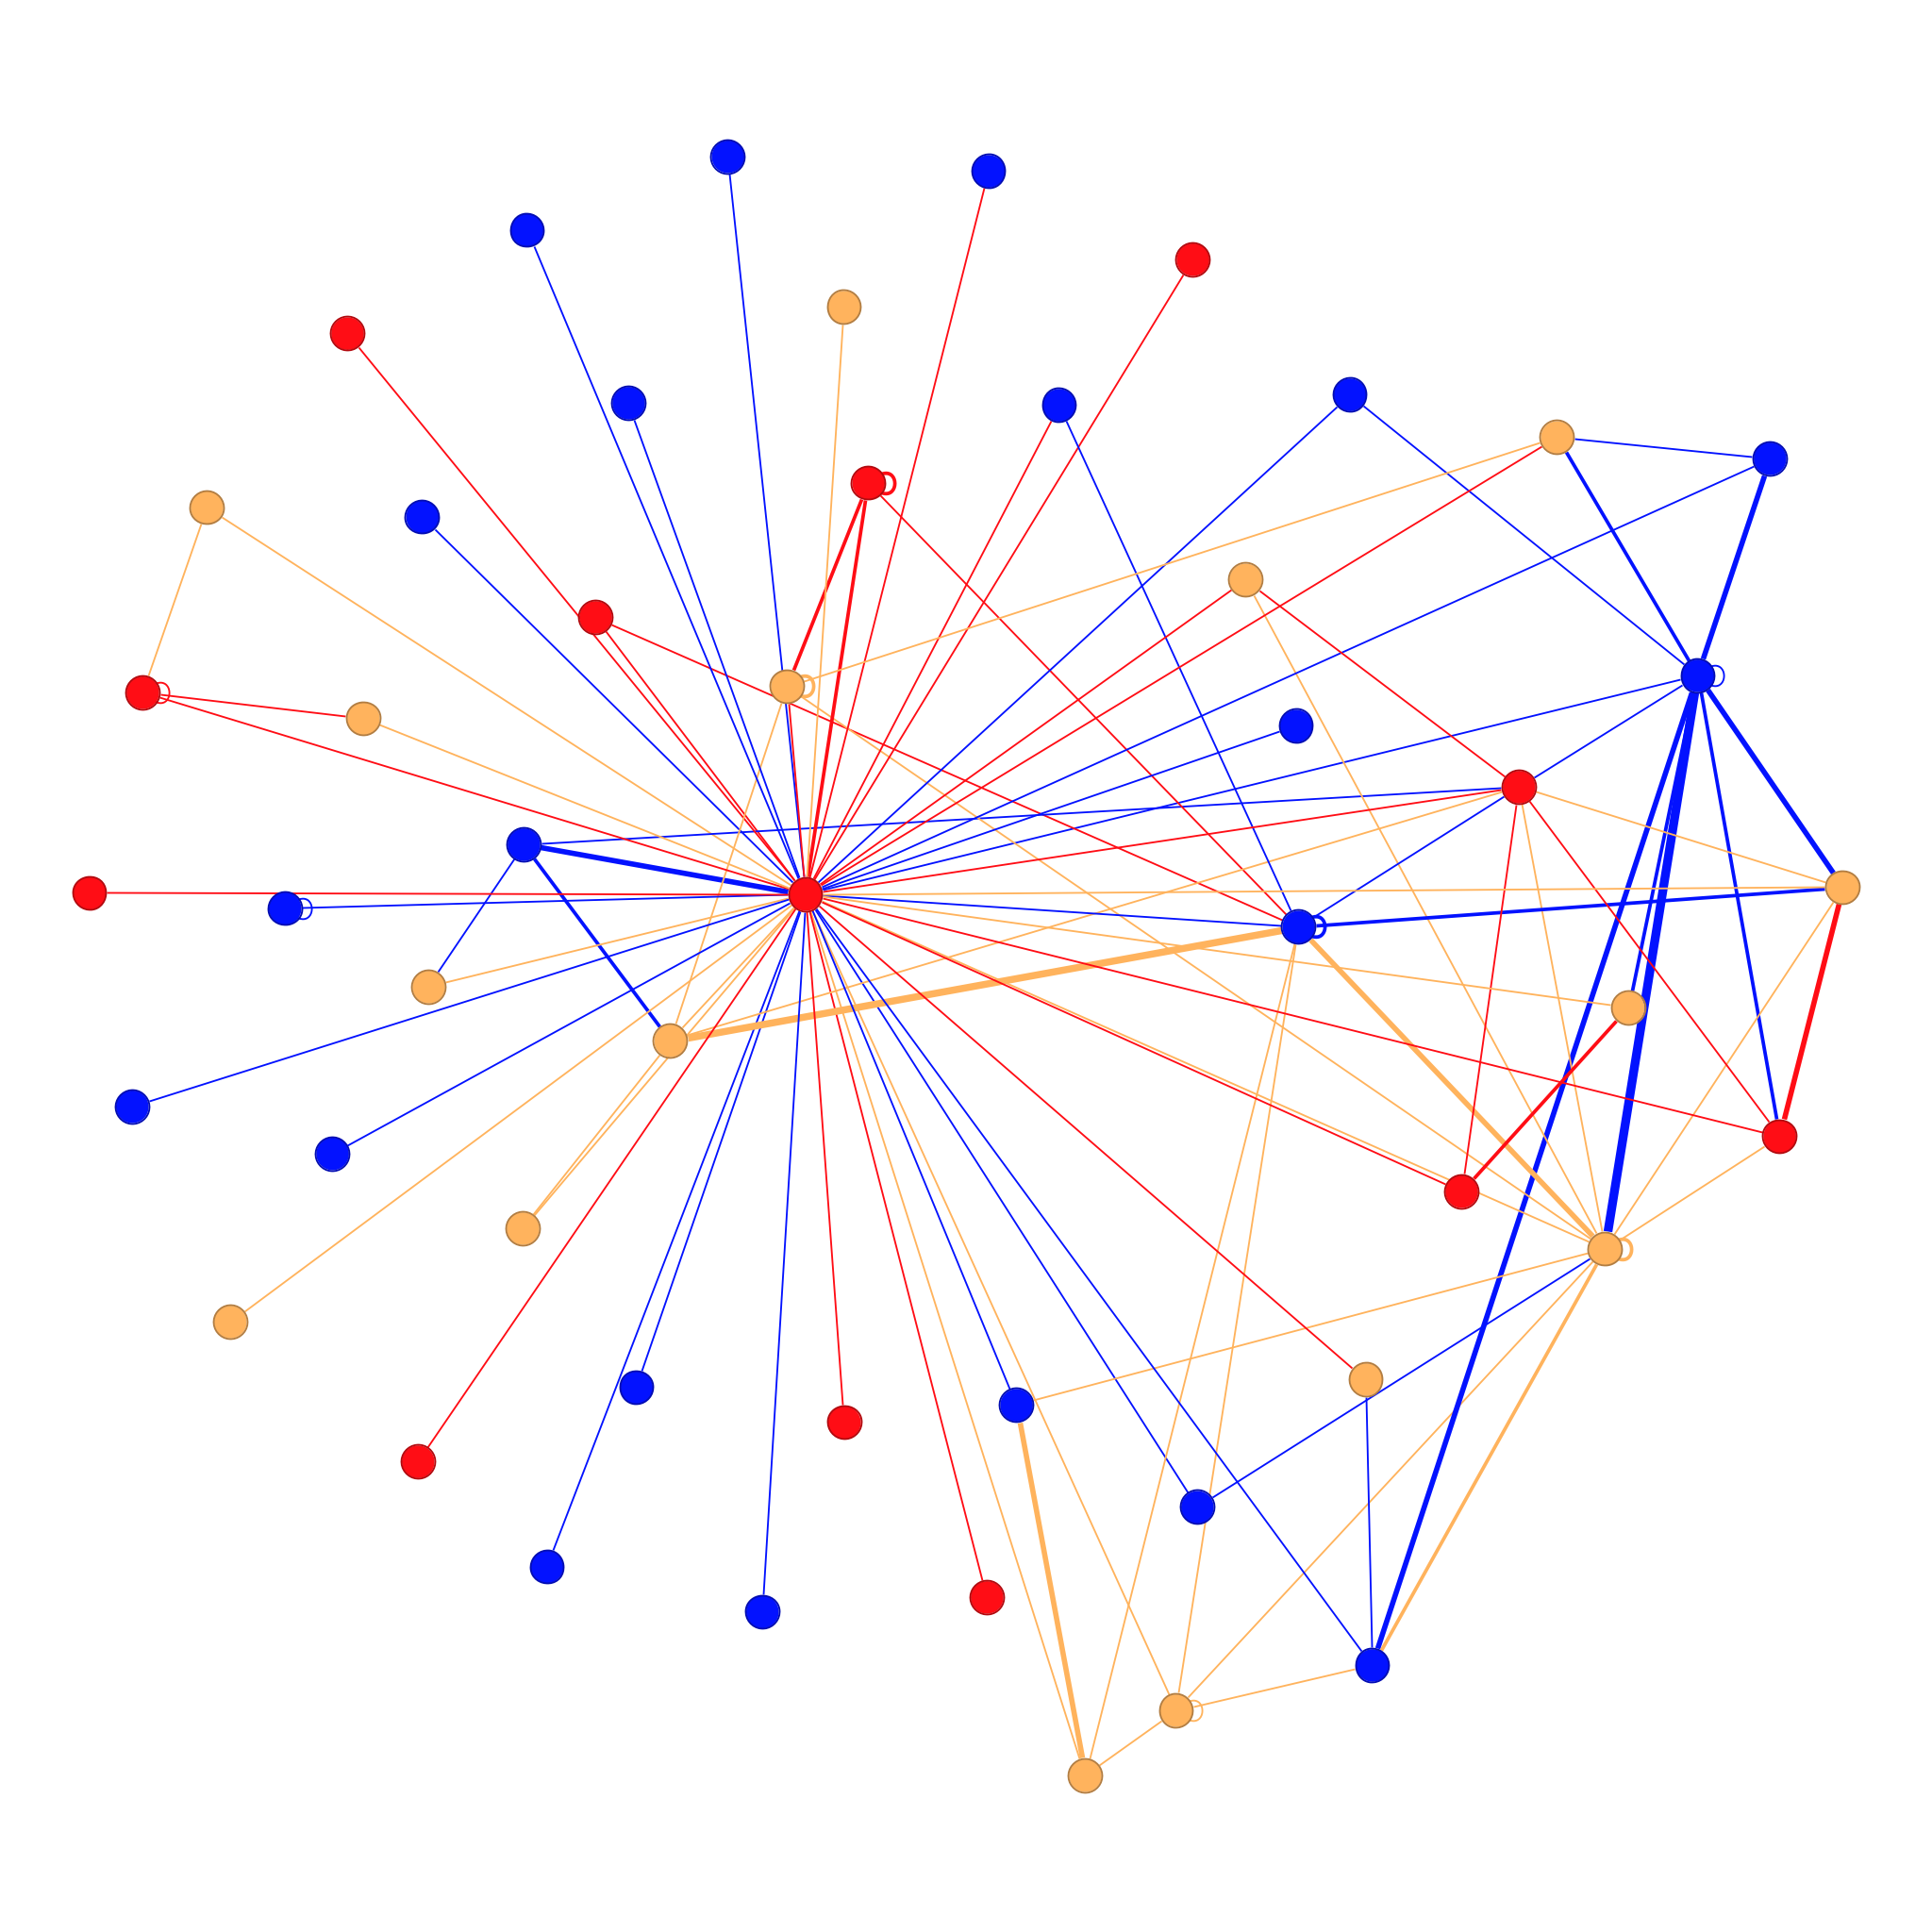

### graph with marked close opnions that are spead through the net

In [ ]:
df_users.head(2)

,user_name,num_of_posts_or_comments,num_antisemetic_comments,max_streanght_antisemitism,sum_antisemitism,mean_strength_antisemitism,timestamp,class,degree
0,Inevitable_Drawer145,6,0,0,0,0.0,2023-10-15 04:12:25,low,3
1,Responsible_Ad6938,5,1,1,1,0.2,2023-10-23 17:00:20,medium,3


#### load edges with timestamp

In [ ]:
with open("/content/drive/MyDrive/BGU - data_mining/edges_with_timestamp.pickle", 'rb') as f:
  edges_with_timestamp = pickle.load(f)
edges_with_timestamp.head(2)

,user_A,to_user_B,timestamp
0,--Jimmy_Kudo--,Nyeteka,2023-10-10 06:56:28
1,--Jimmy_Kudo--,coffeemedd,2023-10-09 03:29:42


#### load content similarity cluster no. 5804

In [ ]:
import pickle
with open("/content/drive/MyDrive/BGU - data_mining/cluster_5804.pickle", 'rb') as f:
  cluster_5804 = pickle.load(f)
cluster_5804.head(20)

,id,user_A,to_user_B
15243,t1_k503olf,voyagercw1996,AchPzYlahyklk
38596,t1_k70kc8r,AmnesiacPatient,Goobee69
38598,t1_k70kddz,AmnesiacPatient,ronthegr8
38600,t1_k70ke7g,AmnesiacPatient,orgad
38601,t1_k70kft7,AmnesiacPatient,Additional_Novel_944
38602,t1_k70kgpr,AmnesiacPatient,Morgentau7
38603,t1_k70kice,AmnesiacPatient,gsitk
38605,t1_k70kj7o,AmnesiacPatient,avbitran
38606,t1_k70kk46,AmnesiacPatient,mikebenb
38607,t1_k70koro,AmnesiacPatient,mikebenb


In [ ]:
cluster_5804_users = list(cluster_5804.user_A.unique())# + list(cluster_5804.to_user_B.unique())
cluster_5804_users

['voyagercw1996',
 'AmnesiacPatient',
 'bryle_m',
 'Barcode3',
 'gert_van_der_whoops',
 'mikebenb']

### mark the comments in the cluster

In [ ]:
edges_with_timestamp['weight'] = 1

### create sub graph from close antisemitic opnions
mark edges that represent those opinions by higher weight

In [ ]:
edges_with_timestamp
for index, row, in edges_with_timestamp.iterrows():
  if any((cluster_5804['user_A'] == row['user_A']) & (cluster_5804['to_user_B'] == row['to_user_B'])):
      edges_with_timestamp.at[index, 'weight'] = 5
  elif any((cluster_5804['to_user_B'] == row['user_A']) & (cluster_5804['user_A'] ==  row['to_user_B'])):
      edges_with_timestamp.at[index, 'weight'] = 5

In [ ]:
sub_graph_5804 = get_subgraph_by_list(graph, list(cluster_5804.user_A.values))
nx.write_gexf(sub_graph_5804, "sub_graph_5804.gexf")

In [ ]:
edges_with_timestamp.head(2)

,user_A,to_user_B,timestamp,weight
0,--Jimmy_Kudo--,Nyeteka,2023-10-10 06:56:28,1
1,--Jimmy_Kudo--,coffeemedd,2023-10-09 03:29:42,1


### graph by edges

In [ ]:
import networkx as nx

def create_subgraph_graph(nodes, edges):
  """
  creates and returns subgrpah, with timestamp.
  for use of dynamic graph, by timeline, in gephi
  """
  sub_graph = nx.Graph()

  # Add nodes with features from df_users
  for index, row in nodes.iterrows():
      user = row['user_name']
      features = {col: row[col] for col in nodes.columns if col not in ['user_name','timestamp']}
      sub_graph.add_node(user, **features, start=row['timestamp'].date().day, end=31)

  # Add edges with weight from the cluster
  for index, row in edges_with_timestamp.iterrows():
    source = row['user_A']
    target = row['to_user_B']
    if source in sub_graph.nodes and target in sub_graph.nodes:
      sub_graph.add_edge(source, target, weight=row['weight'], start=row['timestamp'].date().day, end=31)

  return sub_graph

def get_subgraph_by_list(graph, users_id):
  """
  Returns a subgraph containing all nodes connected to a a list of users.

  Args:
    graph: A NetworkX graph object.
    users_id: list if Users ID whose connections form the subgraph.

  Returns:
    A NetworkX graph object representing the subgraph, or None if the user_id is not in the graph.
  """
  not_found = True
  subgraph_nodes = []
  for user in users_id:
    if user in graph:
      not_found = False
      subgraph_nodes = subgraph_nodes + list(graph.neighbors(user)) + [user]

  if not_found:
    return None
  else:
    return graph.subgraph(list(set(subgraph_nodes)))


### create sub grpahs of content similarity of cluster 5804 (comulative by weeks)

In [ ]:
import pandas as pd


start_date = pd.to_datetime('2023-10-01')
end_date = start_date + pd.Timedelta(days=7)

weekly_graphs = []

for i in range(4):

    # Filter the dataframe for the current week
    weekly_nodes = df_users[(df_users['timestamp'] <= end_date)]

    weekly_edges = edges_with_timestamp[edges_with_timestamp['timestamp'] <= end_date]

    # Append the weekly graph to the list
    weekly_graphs.append(get_subgraph_by_list(create_subgraph_graph(weekly_nodes,weekly_edges), cluster_5804_users))

    end_date = end_date + pd.Timedelta(days=8)

for i, graph in enumerate(weekly_graphs):
    print(f"Week {i+1}: number of nodes: {graph.number_of_nodes()} number of esges: {graph.number_of_edges()}")


Week 1: number of nodes: 11 number of esges: 23
Week 2: number of nodes: 169 number of esges: 838
Week 3: number of nodes: 262 number of esges: 1313
Week 4: number of nodes: 339 number of esges: 1764


In [ ]:
for i, g in enumerate(weekly_graphs):
  nx.write_gexf(g, f"sub_graph_5804_week_{i}.gexf")

In [ ]:
nx.write_graphml(weekly_graphs[3], "sub_graph_5804_dynamic.graphml")

In [ ]:
g0 = graph.subgraph(list(set(cluster_5804_users)))

In [ ]:
"AmnesiacPatient" in weekly_graphs[3].nodes

True

In [ ]:
get_subgraph_by_list(graph, cluster_5804_users).number_of_nodes()

339